# Extracción (E - Extract)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.sample(3)

,customerID,Churn,customer,phone,internet,account
6207,8530-KXSOX,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
899,1265-XTECC,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."
883,1241-FPMOF,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."


# Transformación (Transform - T)

## Normalizando los datos

Las columnas customer, phone, internet, account tienen diccionarios. Se procede a descubrir que informacion posee cada una

### Normalizando **customer**

In [34]:
customer = pd.json_normalize(datos['customer'])
customer.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure
4988,Male,0,No,No,28
6155,Male,0,Yes,Yes,28
4322,Male,1,Yes,No,15


### Normalizando **phone**

In [35]:
phone = pd.json_normalize(datos['phone'])
phone.sample(3)

,PhoneService,MultipleLines
3592,Yes,Yes
3079,Yes,No
2653,Yes,Yes


### Normalizando **internet**

In [36]:
internet = pd.json_normalize(datos['internet'])
internet.sample(3)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5666,DSL,No,Yes,No,No,No,No
2089,Fiber optic,No,No,Yes,Yes,Yes,Yes
304,DSL,No,Yes,Yes,Yes,No,No


### Normalizando **account**

In [37]:
account = pd.json_normalize(datos['account'])
account.sample(3)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
3632,Month-to-month,No,Mailed check,54.35,1647
6688,One year,No,Electronic check,67.45,2443.3
6055,Month-to-month,Yes,Credit card (automatic),68.90,1370.35


#### Uniendo las tablas
Se unen las tablas normalizadas a una nueva unificada llamada datos_normalizado

In [38]:
datos_normalizado = pd.concat(
    [
        datos.drop(columns=['customer', 'phone', 'internet', 'account']),
        customer, phone, internet, account
    ],
    axis=1
)
datos_normalizado.sample(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
4921,6726-WEXXK,No,Male,1,Yes,No,27,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Electronic check,85.90,2220.1
3285,4581-LNWUM,No,Female,0,No,No,13,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.15,649.4
3075,4290-BSXUX,Yes,Male,0,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),79.65,251.75


Se extraen los nombres de las series para futuros analisis.

In [39]:
datos_normalizado.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## Conociendo el conjunto de datos

### dtypes

In [40]:
datos_normalizado.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object

Se puede comprobar que hay consistencia del tipo de datos con la descripción de la serie, a excepción de Charges.Total, donde deberia de se float.64.

### info()

In [41]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Se comprueba que no hay valores nulos en ninguna columna

## Comprobación de Incoherencias en los datos

### Verificando Duplicados


In [42]:
datos_normalizado.duplicated(subset="customerID", keep=False).sum()


np.int64(0)

Se verifica por algun costumerID duplicado

### Verificando Valores Únicos

In [43]:
columnas = ['Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling']

for col in columnas:
    print(f"{col}: {pd.unique(datos_normalizado[col])}")

Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']


Se buscan los valores unicos en las columnas para encontrar incoherencias en las series. Todos llevan logica a excepcion de la serie Churn que contiene valor "".

In [44]:
(datos_normalizado['Churn'] == '').sum()

np.int64(224)

Son 224 valores de la serie Churn que no contienen ningun valor

### Verificando Incoherencias en Charges.Total

In [45]:
mask_no_numericos = pd.to_numeric(datos_normalizado['Charges.Total'], errors='coerce').isna()
mask_no_numericos.sum()


np.int64(11)

In [46]:
datos_normalizado[['Charges.Total']][mask_no_numericos]

,Charges.Total
975,
1775,
1955,
2075,
2232,
2308,
2930,
3134,
3203,
4169,


Son 11 valores vacios que no se pueden convertir.

## Manejo de Incoherencias

#### Transformando serie Charges.Total

Se convierte todos los valores a numero y los que no se pueden, se convierten a NaN y despues a 0.

In [47]:
datos_normalizado['Charges.Total'] = pd.to_numeric(datos_normalizado['Charges.Total'], errors='coerce').fillna(0)

#### Transformando serie Churn

Se eliminan todas las filas que contengan "" en la serie Churn. 224 valores no tendra un impacto significativo

In [48]:
datos_normalizado = datos_normalizado[datos_normalizado['Churn'] != ""]

## Columna de Cuentas Diarias

In [49]:
datos_normalizado['cuentas_diarias'] = datos_normalizado['Charges.Monthly'] / 30

## Estandarización y Transofrmación de Datos

Todas las series que continen valores Yes y No, se cambaian a 0 y 1, al igual que gender.

In [50]:
columnas = [
    'Churn', 'Partner', 'gender',
    'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod']
for col in columnas:
    datos_normalizado[col] = datos_normalizado[col].apply(lambda x: 1 if x in ['Yes', 'Male'] 
                                                                 else 0 if x in ['No', 'No phone service', 'No internet service', 'Female']
                                                                 else x)

Se cambian los nombres de las series a español para un mejor analisis.

In [51]:
datos_normalizado = datos_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'abandono',
    'gender': 'genero',
    'SeniorCitizen': 'ciudadano_senior',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad_meses',
    'PhoneService': 'servicio_telefono',
    'MultipleLines': 'multiples_lineas',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'proteccion_dispositivo',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_peliculas',
    'Contract': 'contrato',
    'PaperlessBilling': 'factura_sin_papel',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total'
})


Con la serie servicio_internet se crean dos nuevas series: tiene_fibra_optica y tiene_dsl, para que tambien tengan valores 0 y 1.

In [52]:
nuevas_columnas = pd.get_dummies(datos_normalizado['servicio_internet'], prefix='servicio_internet', dtype=int)

for i, col in enumerate(nuevas_columnas.columns):
    # 'insert' añade la columna en la posición deseada
    # La posición se ajusta con 'i + 1' para que se inserten en orden
    datos_normalizado.insert(9 + i + 1, col, nuevas_columnas[col])

datos_normalizado.drop('servicio_internet_0', axis=1, inplace=True)

datos_normalizado = datos_normalizado.rename(columns={
    'servicio_internet_DSL': 'tiene_dsl',
    'servicio_internet_Fiber optic': 'tiene_fibra_optica'
})

datos_normalizado['servicio_internet'] = datos_normalizado['servicio_internet'].apply(lambda x: 1 if x != 0 else 0)



Se extraen los nuevos nombres de las columnas para futuro analisis

In [53]:
datos_normalizado.columns

Index(['id_cliente', 'abandono', 'genero', 'ciudadano_senior', 'pareja',
       'dependientes', 'antiguedad_meses', 'servicio_telefono',
       'multiples_lineas', 'servicio_internet', 'tiene_dsl',
       'tiene_fibra_optica', 'seguridad_online', 'backup_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas', 'contrato', 'factura_sin_papel', 'metodo_pago',
       'cargo_mensual', 'cargo_total', 'cuentas_diarias'],
      dtype='object')

Se verifican como quedaron los valores unicos de las series booleanas

In [54]:
columnas1 = ['abandono', 'genero', 'ciudadano_senior', 'pareja',
       'dependientes', 'servicio_telefono',
       'multiples_lineas', 'servicio_internet', 'tiene_dsl',
       'tiene_fibra_optica', 'seguridad_online', 'backup_online',
       'proteccion_dispositivo', 'soporte_tecnico', 'streaming_tv',
       'streaming_peliculas','factura_sin_papel']
for col in columnas1:
    print(f"{col}: {pd.unique(datos_normalizado[col])}")

abandono: [0 1]
genero: [0 1]
ciudadano_senior: [0 1]
pareja: [1 0]
dependientes: [1 0]
servicio_telefono: [1 0]
multiples_lineas: [0 1]
servicio_internet: [1 0]
tiene_dsl: [1 0]
tiene_fibra_optica: [0 1]
seguridad_online: [0 1]
backup_online: [1 0]
proteccion_dispositivo: [0 1]
soporte_tecnico: [1 0]
streaming_tv: [1 0]
streaming_peliculas: [0 1]
factura_sin_papel: [1 0]


Se verifican la info de todas las series para asegurarnos que todos los datos son coherentes

In [55]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7043 non-null   object 
 1   abandono                7043 non-null   int64  
 2   genero                  7043 non-null   int64  
 3   ciudadano_senior        7043 non-null   int64  
 4   pareja                  7043 non-null   int64  
 5   dependientes            7043 non-null   int64  
 6   antiguedad_meses        7043 non-null   int64  
 7   servicio_telefono       7043 non-null   int64  
 8   multiples_lineas        7043 non-null   int64  
 9   servicio_internet       7043 non-null   int64  
 10  tiene_dsl               7043 non-null   int64  
 11  tiene_fibra_optica      7043 non-null   int64  
 12  seguridad_online        7043 non-null   int64  
 13  backup_online           7043 non-null   int64  
 14  proteccion_dispositivo  7043 non-null   int64

Como ultimo paso reseteamos el indice.

In [56]:
datos_normalizado = datos_normalizado.reset_index(drop=True)

# Carga y Analisis

## Analisis Descriptivo

Se hace un analisis descriptivo de las seriers

In [57]:
pd.set_option('display.max_columns', None)

analisis_descriptivo = datos_normalizado.describe()
analisis_descriptivo

,abandono,genero,ciudadano_senior,pareja,dependientes,antiguedad_meses,servicio_telefono,multiples_lineas,servicio_internet,tiene_dsl,tiene_fibra_optica,seguridad_online,backup_online,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,factura_sin_papel,cargo_mensual,cargo_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.783331,0.343746,0.439585,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.412004,0.474991,0.496372,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


## Distribución De Evasión

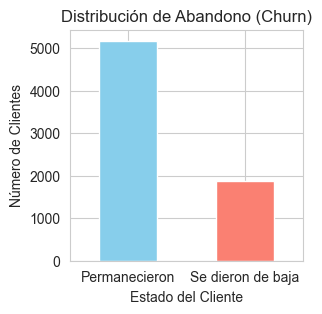

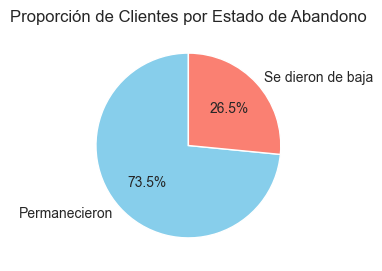

In [58]:
conteo_abandono = datos_normalizado['abandono'].value_counts()

# Gráfico de Barras
plt.figure(figsize=(3, 3))
conteo_abandono.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Abandono (Churn)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Permanecieron', 'Se dieron de baja'], rotation=0)

# Gráfico de Tarta
plt.figure(figsize=(3, 3))
plt.pie(conteo_abandono, labels=['Permanecieron', 'Se dieron de baja'],
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Clientes por Estado de Abandono')
plt.show()

## Recuento de evasión por variables categóricas

### Por Cantidad/Frecuencia

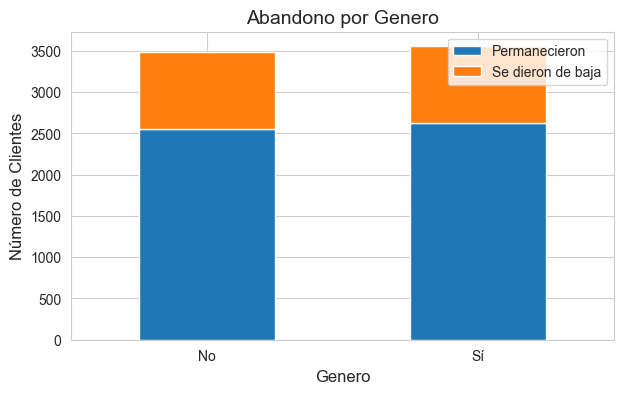

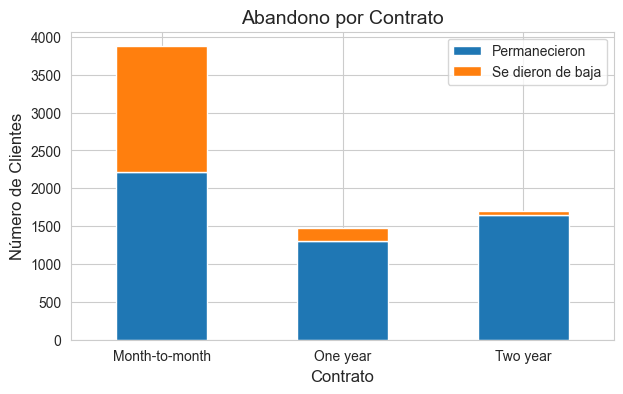

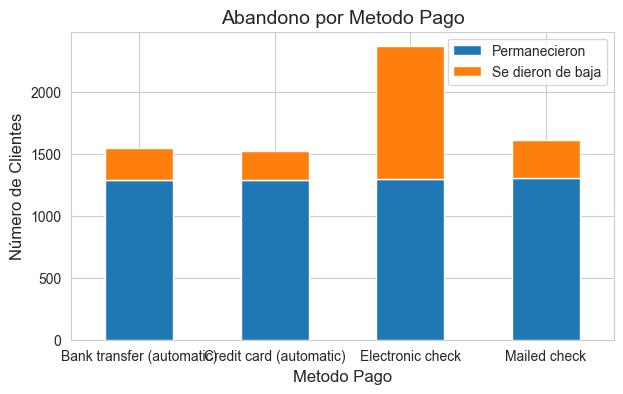

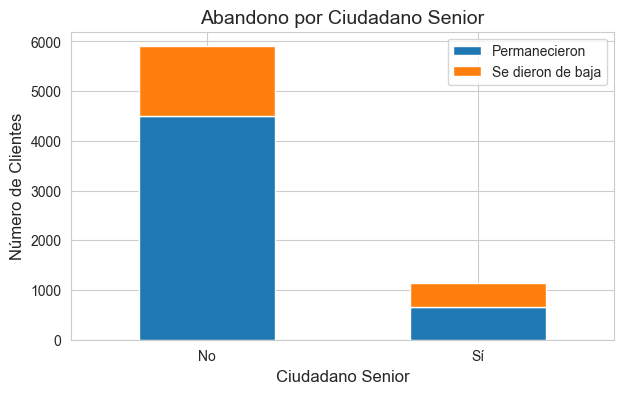

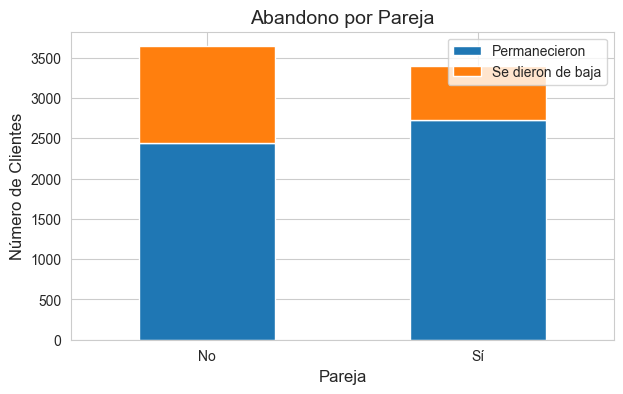

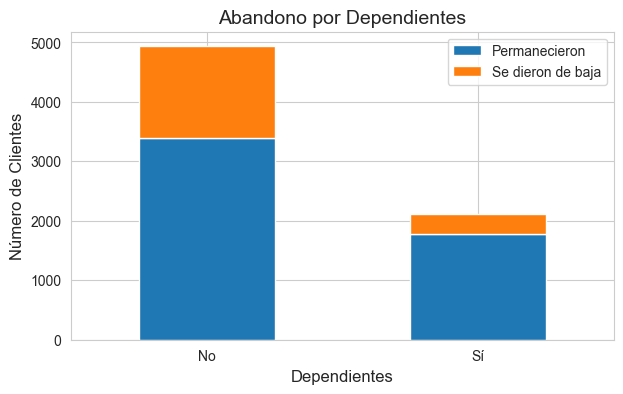

In [59]:


columnas_categoricas = ['genero', 'contrato', 'metodo_pago', 'ciudadano_senior', 'pareja', 'dependientes']

for columna in columnas_categoricas:
    proporcion = datos_normalizado.groupby(columna)['abandono'].mean()
    conteo_total = datos_normalizado[columna].value_counts()

    df_grafico = pd.DataFrame({
        'Permanecieron': conteo_total * (1 - proporcion),
        'Se dieron de baja': conteo_total * proporcion
    })

    df_grafico.plot(kind='bar', stacked=True, figsize=(7,4))

    # Obtener las etiquetas actuales y crear las nuevas dinámicamente
    current_labels = [label.get_text() for label in plt.gca().get_xticklabels()]
    new_labels = []
    for label in current_labels:
        if label == '0':
            new_labels.append('No')
        elif label == '1':
            new_labels.append('Sí')
        else:
            new_labels.append(label)  # Mantener la etiqueta original si no es 0 o 1
    
    plt.gca().set_xticklabels(new_labels)

    plt.title(f'Abandono por {columna.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(columna.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.xticks(rotation=0)
    plt.show()

### Por Proporción

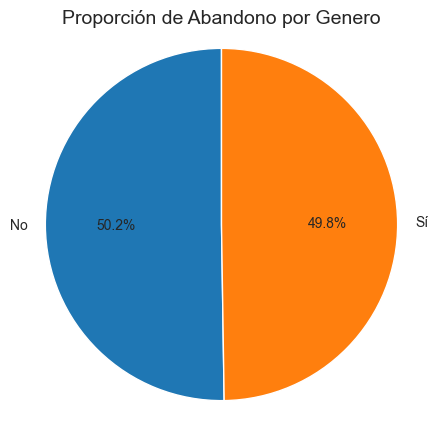

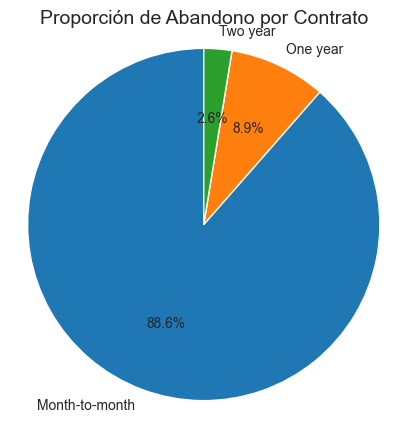

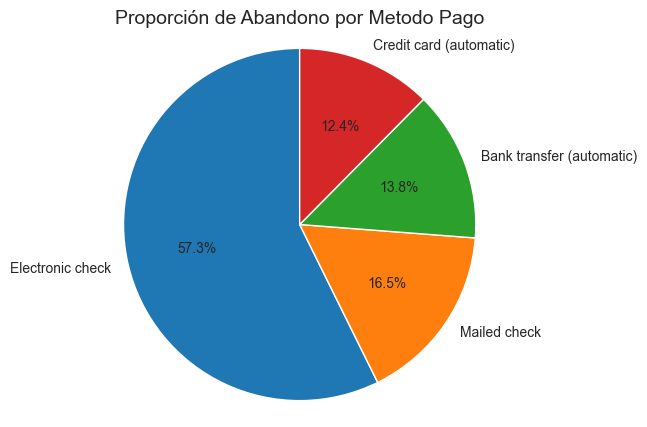

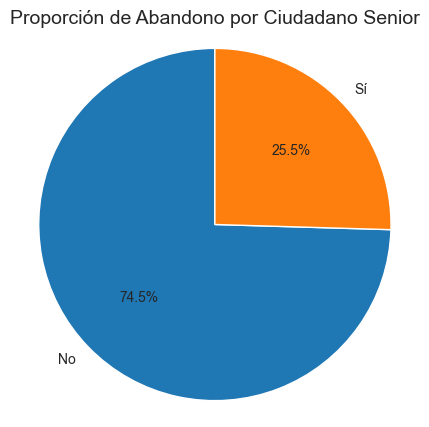

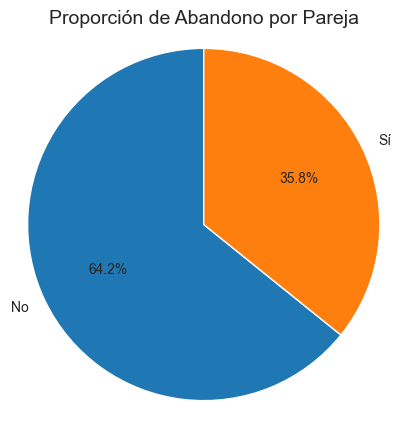

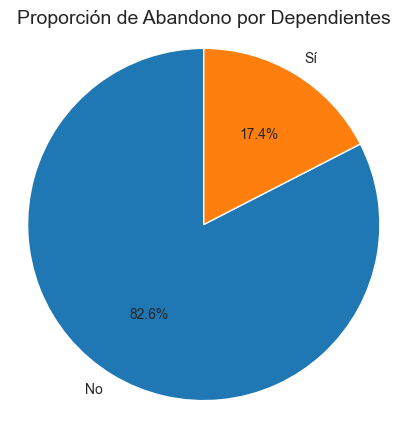

In [60]:

# Filtrar solo los clientes que abandonaron
clientes_abandono = datos_normalizado[datos_normalizado['abandono'] == 1]

# Configurar el estilo
sns.set_style("whitegrid")

for columna in columnas_categoricas:
    # Contar las categorías solo para los que abandonaron
    conteos = clientes_abandono[columna].value_counts()
    
    # Crear etiquetas dinámicamente
    labels = []
    for idx in conteos.index:
        if idx == 0:
            labels.append('No')
        elif idx == 1:
            labels.append('Sí')
        else:
            labels.append(str(idx))
    
    # Crear el gráfico de pie
    plt.figure(figsize=(5, 5))
    plt.pie(conteos.values, labels=labels, autopct='%1.1f%%', startangle=90)
    
    # Configurar título
    plt.title(f'Proporción de Abandono por {columna.replace("_", " ").title()}', fontsize=14)
    plt.axis('equal')  # Para que el pie sea circular
    
    # Mostrar el gráfico
    plt.show()

## Conteo de Evasión por Variables Numéricas

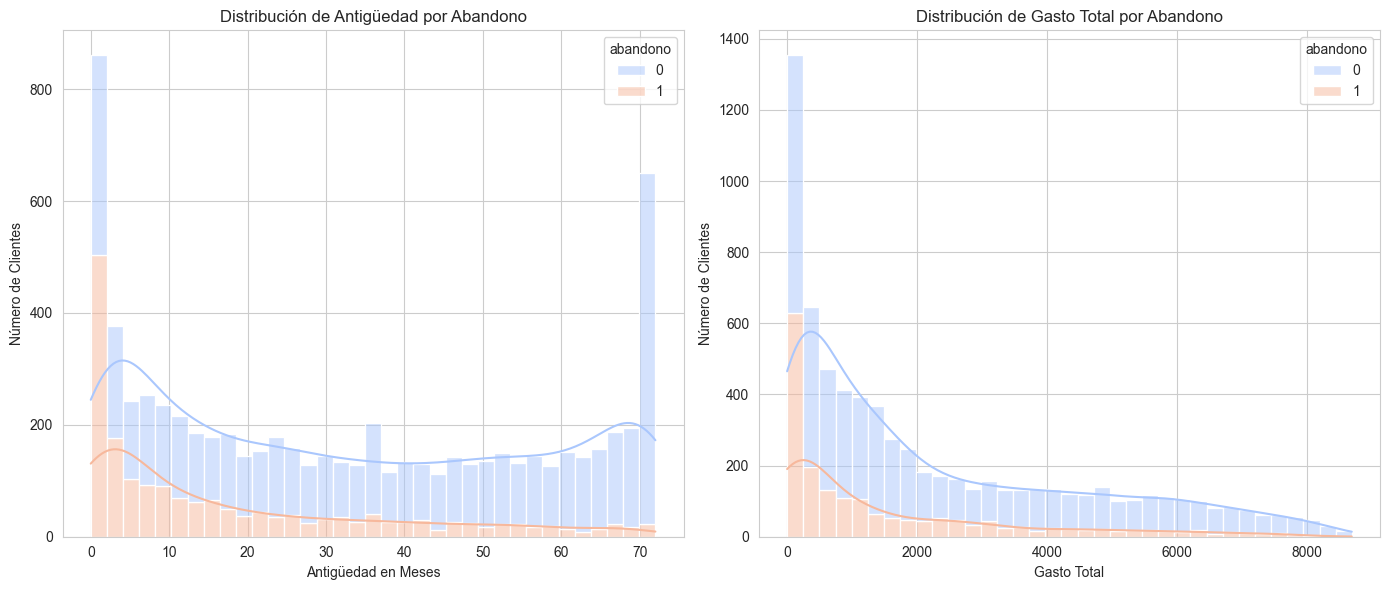

In [61]:
# Crea los histogramas superpuestos
plt.figure(figsize=(14, 6))

# Histograma para 'antiguedad_meses'
plt.subplot(1, 2, 1)
sns.histplot(data=datos_normalizado, x='antiguedad_meses', hue='abandono', multiple='stack', bins=35, kde=True, palette='coolwarm')
plt.title('Distribución de Antigüedad por Abandono')
plt.xlabel('Antigüedad en Meses')
plt.ylabel('Número de Clientes')

# Histograma para 'gasto_total'
plt.subplot(1, 2, 2)
sns.histplot(data=datos_normalizado, x='cargo_total', hue='abandono', multiple='stack', bins=35, kde=True, palette='coolwarm')
plt.title('Distribución de Gasto Total por Abandono')
plt.xlabel('Gasto Total')
plt.ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

##  Análisis de Correlación entre Variables

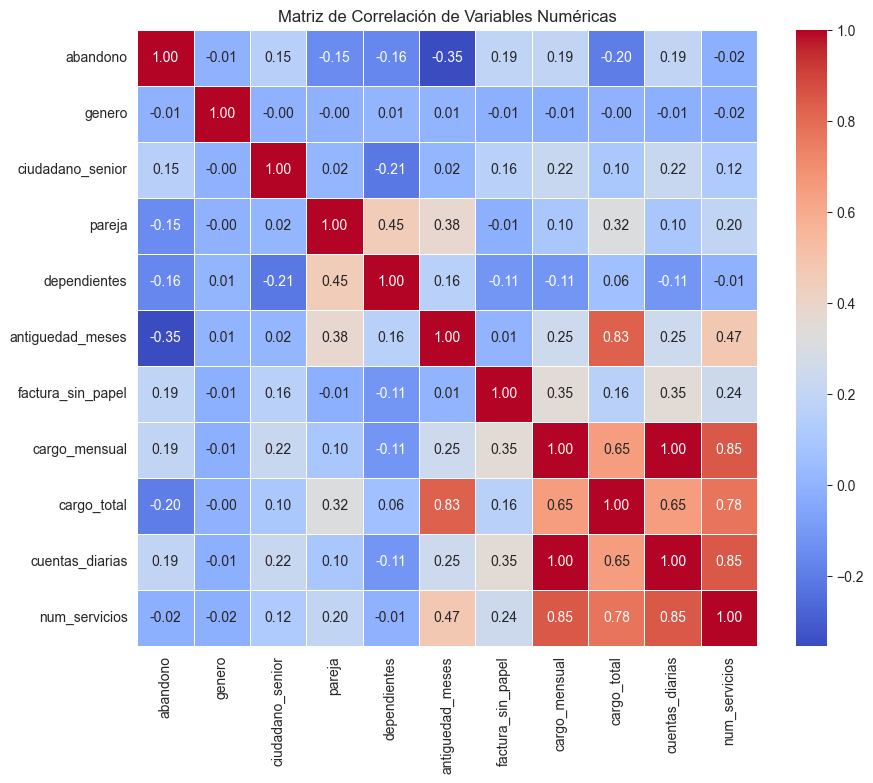

In [62]:
columnas_servicio = [
    'servicio_telefono', 'multiples_lineas',
    'tiene_dsl', 'tiene_fibra_optica',
    'seguridad_online', 'backup_online', 'proteccion_dispositivo',
    'soporte_tecnico', 'streaming_tv', 'streaming_peliculas'
]

datos_normalizado1 = datos_normalizado.copy()
datos_normalizado1['num_servicios'] = datos_normalizado[columnas_servicio].sum(axis=1)

#variables_numericas = ['antiguedad_meses', 'cargo_total', 'abandono', 'cargo_mensual', 'num_servicios']
variables_numericas = ['abandono', 'genero', 'ciudadano_senior', 'pareja',
       'dependientes', 'antiguedad_meses', 'factura_sin_papel', 'cargo_mensual', 'cargo_total', 'cuentas_diarias', 'num_servicios']

# Calculamos la matriz de correlación
matriz_correlacion = datos_normalizado1[variables_numericas].corr()

# Creamos un mapa de calor para visualizar la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

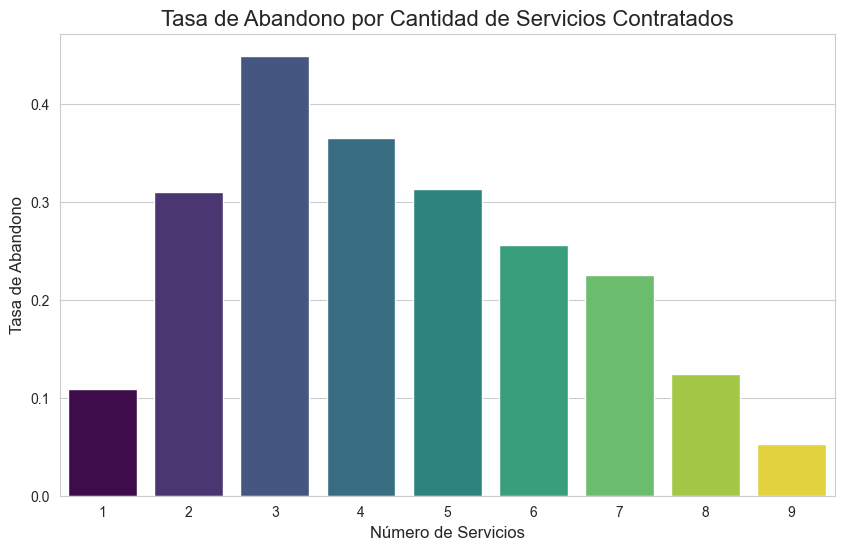

In [63]:
tasa_abandono_por_servicios = datos_normalizado1.groupby('num_servicios')['abandono'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='num_servicios', 
    y='abandono', 
    data=tasa_abandono_por_servicios, 
    hue='num_servicios',
    palette='viridis',
    legend=False
)

plt.title('Tasa de Abandono por Cantidad de Servicios Contratados', fontsize=16)
plt.xlabel('Número de Servicios', fontsize=12)
plt.ylabel('Tasa de Abandono', fontsize=12)
plt.show()


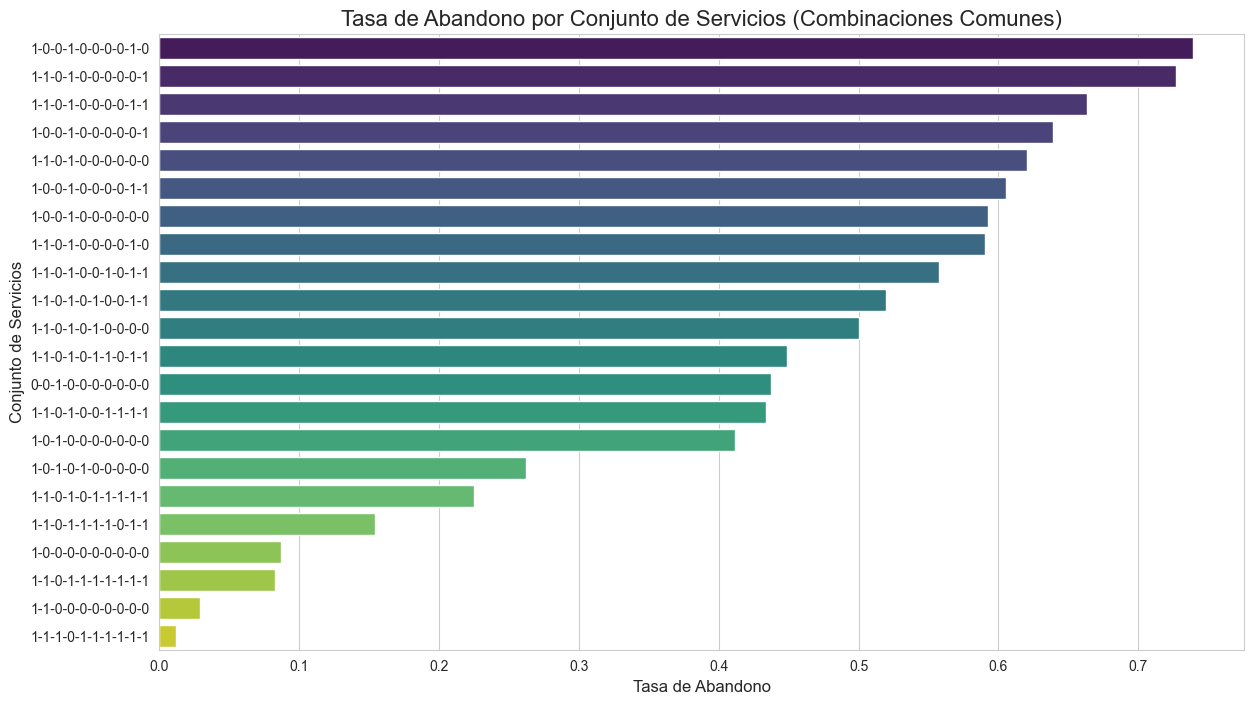

In [74]:
datos_normalizado1['conjunto_servicios'] = datos_normalizado[columnas_servicio].astype(str).agg('-'.join, axis=1)

conteo_combinaciones = datos_normalizado1['conjunto_servicios'].value_counts()
combinaciones_comunes = conteo_combinaciones[conteo_combinaciones > 50].index
datos_comunes = datos_normalizado1[datos_normalizado1['conjunto_servicios'].isin(combinaciones_comunes)]

# Paso 3: Calcular la tasa de abandono para cada conjunto de servicios
tasa_abandono_por_conjunto = datos_comunes.groupby('conjunto_servicios')['abandono'].mean().sort_values(ascending=False).reset_index()

# Paso 4: Visualizar los resultados en un gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(
    x='abandono', 
    y='conjunto_servicios', 
    data=tasa_abandono_por_conjunto, 
    hue='conjunto_servicios',
    palette='viridis',
    legend=False
)

plt.title('Tasa de Abandono por Conjunto de Servicios (Combinaciones Comunes)', fontsize=16)
plt.xlabel('Tasa de Abandono', fontsize=12)
plt.ylabel('Conjunto de Servicios', fontsize=12)
plt.show()

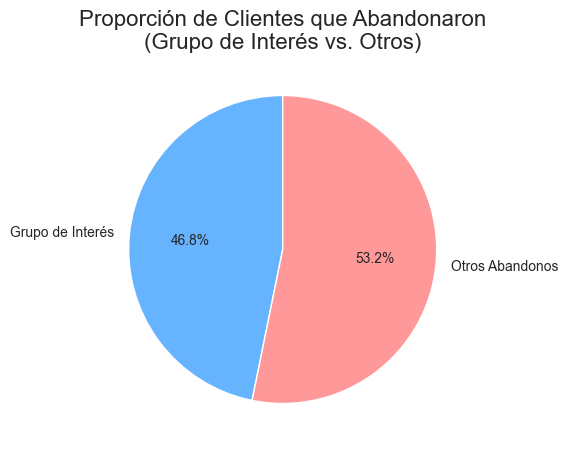

In [75]:
# 1. Filtramos los datos para obtener solo a los clientes que abandonaron
clientes_abandono = datos_normalizado1[datos_normalizado['abandono'] == 1]

# 2. Creamos la condición para identificar a tu grupo de interés
condicion_grupo_interes = (
    (clientes_abandono['servicio_telefono'] == 1) &
    (clientes_abandono['tiene_fibra_optica'] == 1) &
    (
        (clientes_abandono['streaming_tv'] == 1) |
        (clientes_abandono['streaming_peliculas'] == 1)
    )
)

# 3. Contamos los clientes en cada categoría
# Grupo de interés: clientes que abandonaron y cumplen la condición
grupo_interes = clientes_abandono[condicion_grupo_interes].shape[0]

# El resto: total de abandonos menos el grupo de interés
otros_abandonos = clientes_abandono.shape[0] - grupo_interes

# 4. Preparamos los datos para el gráfico de tarta
proporciones = pd.Series(
    [grupo_interes, otros_abandonos],
    index=['Grupo de Interés', 'Otros Abandonos']
)

# 5. Generamos el gráfico de tarta de dos partes
plt.figure(figsize=(5, 5))
plt.pie(
    proporciones,
    labels=proporciones.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999']
)
plt.title('Proporción de Clientes que Abandonaron\n(Grupo de Interés vs. Otros)', fontsize=16)
plt.show()

### Carga de la tabla

In [76]:
datos_normalizado.to_csv('Normalizado_Challenge_Telecom_X.csv', index=False)

# Informe Final – Análisis de Evasión de Clientes (abandono)

## 1. Introducción
El presente análisis tiene como objetivo identificar patrones y factores clave asociados a la evasión de clientes (*abandono*) en una empresa de telecomunicaciones. El *churn* se refiere a la cancelación voluntaria del servicio por parte del cliente, lo cual representa una pérdida directa de ingresos y un incremento en los costos de adquisición de nuevos usuarios.  
El análisis busca no solo describir el comportamiento de los clientes que abandonan el servicio, sino también generar información útil para diseñar estrategias de retención basadas en datos.

## 2. Limpieza y Tratamiento de Datos
El proceso de limpieza y tratamiento incluyó las siguientes etapas:

- **Importación de datos** desde el archivo original proporcionado.
- **Identificación y manejo de valores nulos**, garantizando que no existieran registros incompletos que distorsionaran el análisis.
- **Conversión de variables categóricas a formato numérico** mediante codificación binaria (0 y 1) para facilitar el cálculo de correlaciones.
- **Normalización de datos numéricos** para homogeneizar las escalas y permitir análisis comparables.
- **Creación de la variable `cuentas_diarias`**, calculada como `cargo_mensual / 30`, proporcionando una visión más granular del valor económico diario de cada cliente.

## 3. Análisis Exploratorio de Datos (EDA)
Durante el análisis exploratorio, se desarrollaron distintas visualizaciones y métricas para identificar tendencias y correlaciones:

- **Distribución de clientes según estado de churn**: Se observó un porcentaje significativo de clientes que abandonan el servicio.
- **Relación entre tener pareja y churn**: El 64.2% de los clientes que abandonan no tienen pareja.
- **Relación entre dependientes y churn**: El 82.6% de los clientes que abandonan no tienen dependientes.
- **Correlaciones entre variables numéricas**: Aunque varias variables eran binarias, se identificaron asociaciones moderadas entre tipo de contrato, servicios adicionales y permanencia del cliente.
- **Visualizaciones clave**:
  - Gráficos de barras mostrando la distribución de churn por variables demográficas y de servicio.
  - Mapas de calor de correlación para detectar variables más relacionadas con el abandono.
  - Histogramas y boxplots de cargos mensuales y totales para observar diferencias entre clientes que permanecen y los que abandonan.

## 4. Conclusiones e Insights
Los principales hallazgos del análisis son:

1. Los clientes sin pareja y sin dependientes presentan mayores tasas de abandono.
2. El tipo de contrato es un factor determinante: los contratos a corto plazo se asocian con mayor churn.
3. Los clientes con múltiples servicios tienden a permanecer más tiempo, lo que sugiere que la diversificación de productos mejora la retención.
4. Cargos mensuales más altos, especialmente sin beneficios adicionales claros, pueden incrementar la probabilidad de cancelación.
5. La facturación diaria (`cuentas_diarias`) permite identificar segmentos de clientes de alto valor que deberían recibir atención prioritaria.

## 5. Recomendaciones
A partir de los hallazgos, se sugieren las siguientes acciones estratégicas:

1. **Programas de retención específicos** para clientes sin pareja o dependientes, posiblemente mediante ofertas personalizadas o beneficios exclusivos.
2. **Promoción de contratos a largo plazo** con descuentos o paquetes de servicios que incrementen el compromiso del cliente.
3. **Incrementar el *cross-selling***, incentivando la contratación de múltiples servicios para aumentar la fidelidad.
4. **Revisión de tarifas y planes** para clientes con cargos altos, asegurando que perciban un valor proporcional.
5. **Monitoreo proactivo** de clientes con alta facturación diaria para prevenir su deserción mediante atención preferencial.
